# Bank Customer Churn Prediction using Neural Networks

**Problem Statement:** Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Objectives:**
1. Read and pre-process the dataset.
2. Distinguish the feature and target set and divide the data into training and test sets.
3. Normalize the feature data.
4. Initialize, build, and train the neural network model.
5. Evaluate the model using accuracy score and confusion matrix.
6. Identify points for improvement.

## Imports
Import necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Loading & Preprocessing

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 1.2: Clean Data
Drop unnecessary columns like 'Email No.' which is just an identifier.

In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

### 1.3. Feature and Target Set
Define Features (X) and Target (y):

In [6]:
# 'Exited' is the target column
X = df.drop("Exited", axis=1)
y = df["Exited"]

### 1.4. Feature and Target Set
Check target variable distribution for imbalance

In [7]:
print(y.value_counts(normalize=True))

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


### 1.5. Train-Test Split
Split the data into training and testing sets (80% train, 20% test).

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (8000, 10)
Test set shape: (2000, 10)


### 1.6 Identify numerical and categorical features

In [11]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

### 1.7 Encoding Categorical Data
Converts categorical features (Geography, Gender) into numerical dummy variables. We use drop='first' to avoid multicollinearity.

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

In [14]:
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()

In [15]:
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()

### 1.8 Normalize the Data
Normalizes the numerical features by removing the mean and scaling to unit variance. This is essential for neural networks.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

In [19]:
X_test_scaled = scaler.transform(X_test[numerical_features])

### 1.9 Combine processed features

In [20]:
X_train_processed = np.hstack((X_train_scaled, X_train_encoded))
X_test_processed = np.hstack((X_test_scaled, X_test_encoded))

In [21]:
input_dim = X_train_processed.shape[1]

In [22]:
X_train_processed.shape

(8000, 11)

### 2. Initialize and Build the Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
# Adding the input and first hidden layer
model.add(Dense(units=6, activation='relu', input_dim=input_dim))

C:\Users\Admin\ml-env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Adding the second hidden layer
model.add(Dense(units=6, activation='relu'))

In [27]:
# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Training the ANN
history = model.fit( X_train_processed, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7386 - loss: 0.5476
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: 0.4515  
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4350  
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4272
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8139 - loss: 0.4213
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8173 - loss: 0.4154  
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8230 - loss: 0.4087  
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4019
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8301 - loss: 0.3935  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8316 - loss: 0.3870
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8369 - loss: 0.3818
Epoch 12/100
250/250 ━━━━━━━━━━

### 5. Print the Accuracy Score and Confusion Matrix

In [30]:
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy = accuracy_score(y_test, y_pred)

In [33]:
print(f"\nTest Set Accuracy: {accuracy:.4f}")


Test Set Accuracy: 0.8605


In [34]:
# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1537   70]
 [ 209  184]]


Text(58.222222222222214, 0.5, 'Actual')

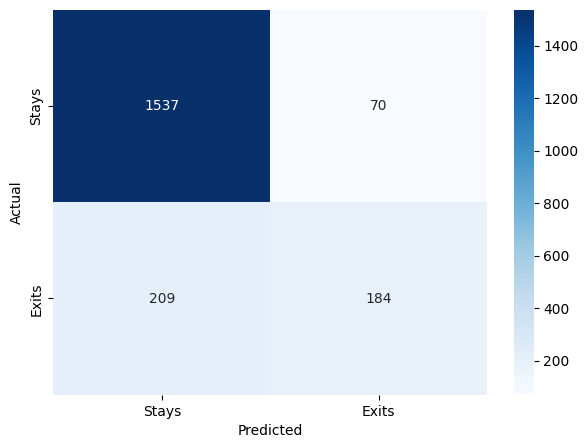

In [49]:
# Plot confusion matrix (optional)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stays', 'Exits'], yticklabels=['Stays', 'Exits'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Points of Improvement

The current model provides a good baseline, but several improvements can be implemented:

1.  **Hyperparameter Tuning:** Experiment with different numbers of hidden layers, neurons per layer, and activation functions. The number of neurons (6) in the hidden layers is a common starting point (average of input and output layers), but may not be optimal.

2.  **Regularization:** To prevent overfitting, especially with more complex models, dropout layers (`from tensorflow.keras.layers import Dropout`) can be added between the hidden layers. This randomly deactivates a fraction of neurons during training, forcing the network to learn more robust features.

3.  **Optimizer and Learning Rate:** While 'adam' is a robust default optimizer, experimenting with others like 'RMSprop' or 'SGD' with momentum could yield better results. The learning rate of the optimizer can also be tuned.

4.  **Batch Size and Epochs:** Adjusting the batch size and the number of training epochs can impact performance and training time. The model might benefit from more epochs if it is underfitting, or fewer if it is overfitting. Early stopping can be used to monitor validation loss and stop training when it no longer improves.

### 3.Build the Improved Model

### 3.1. Calculate Class Weights for imbalance

In [37]:
from sklearn.utils import class_weight

In [38]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [39]:
class_weights_dict = dict(enumerate(class_weights))

In [40]:
print(f"\nCalculated Class Weights: {class_weights_dict}")
print("Class 0 (Stays) will be weighted less, Class 1 (Exits) will be weighted more.")


Calculated Class Weights: {0: np.float64(0.6293266205160478), 1: np.float64(2.4330900243309004)}
Class 0 (Stays) will be weighted less, Class 1 (Exits) will be weighted more.


### 3.2. Build Improved Model with Dropout

In [41]:
from tensorflow.keras.layers import Dropout

In [42]:
model_improved = Sequential()
model_improved.add(Dense(units=12, activation='relu', input_dim=input_dim))
model_improved.add(Dropout(0.3))  # Add dropout (30%)
model_improved.add(Dense(units=8, activation='relu'))
model_improved.add(Dropout(0.3))  # Add dropout (30%)
model_improved.add(Dense(units=1, activation='sigmoid'))

C:\Users\Admin\ml-env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Compile the improved model
model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Training the improved ANN
history_improved = model.fit( X_train_processed, y_train, batch_size=32, epochs=100, class_weight=class_weights_dict, verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7956 - loss: 0.4710
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.4571
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.4579  
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7900 - loss: 0.4553
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4562
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.4551
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.4546
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4549
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7885 - loss: 0.4547  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7879 - loss: 0.4547  
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4540
Epoch 12/100
250/250 ━━━━━━━━━━━━━━

### 3.3. Evaluate Improved Model

In [45]:
# Make predictions with the improved model
y_pred_probs_imp = model_improved.predict(X_test_processed)
y_pred_imp = (y_pred_probs_imp > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
# Calculate and print accuracy
accuracy_imp = accuracy_score(y_test, y_pred_imp)
print(f"\nImproved Model - Test Set Accuracy: {accuracy_imp:.4f}")


Improved Model - Test Set Accuracy: 0.2390


In [47]:
# Calculate and print confusion matrix
cm_imp = confusion_matrix(y_test, y_pred_imp)
print("Improved Model - Confusion Matrix:")
print(cm_imp)

Improved Model - Confusion Matrix:
[[  95 1512]
 [  10  383]]


In [48]:
print("\n--- Evaluation Complete ---")
print(f"Initial Accuracy: {accuracy:.4f}")
print(f"Improved Accuracy: {accuracy_imp:.4f}")


--- Evaluation Complete ---
Initial Accuracy: 0.8605
Improved Accuracy: 0.2390


# Notes

### **2. Artificial Neural Network (ANN) Concepts**

An ANN is a computational model inspired by the structure and function of the human brain, composed of interconnected nodes called neurons organized in layers.

#### **2.1. Keras `Sequential` Model**

* **Introduction:** The `Sequential` model is the simplest way to build a model in Keras. It allows you to create a model layer-by-layer, in a linear stack.
* **Why We Used It:** Our network was a simple feed-forward classifier, where data flows directly from the input, through the hidden layers, to the output. The `Sequential` API is the most straightforward tool for this architecture.

#### **2.2. `Dense` Layer**

* **Introduction:** A `Dense` layer, or a "fully connected" layer, is the most common type of layer in an ANN. In a `Dense` layer, every neuron is connected to every neuron in the previous layer.
* **Why We Used It:** These layers are responsible for learning patterns. Each connection has a "weight," and the layer learns by adjusting these weights during training.
* **Properties:** The primary operation within a neuron of a `Dense` layer is:
    $$output = activation(\sum(weights \times inputs) + bias)$$

---

### **3. Activation Functions**

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns that a simple linear model could not.

#### **3.1. ReLU (Rectified Linear Unit)**

* **Introduction:** ReLU is the most popular activation function used in the *hidden layers* of a neural network.
* **Why We Used It:**
    1.  **Non-linearity:** It introduces the non-linearity needed to learn complex data.
    2.  **Computational Efficiency:** It is very fast to compute (just a `max(0, x)` operation).
    3.  **Mitigates Vanishing Gradients:** It does not saturate for positive inputs, which helps the model train faster and more effectively than older functions like `tanh` or `sigmoid`.
* **Formula:**
    $$f(x) = \max(0, x)$$

#### **3.2. Sigmoid Function**

* **Introduction:** The Sigmoid function is an activation function that squashes any real-valued number into a range between $0$ and $1$.
* **Why We Used It:** It was used *only in the output layer*. For a binary classification problem, we need the model to output a single number that represents a probability (e.g., the probability of the customer "Exiting"). The Sigmoid function is perfect for this, as its $0$ to $1$ output is easily interpreted as a probability.
* **Formula:**
    $$f(x) = \frac{1}{1 + e^{-x}}$$


### **1. Artificial Neural Network (ANN) Architecture**

An ANN is a computing system inspired by the biological brain. It learns by finding complex patterns in data through a layered structure of interconnected "neurons."

#### **1.1. The Neuron (Perceptron)**

* **Introduction:** The neuron is the basic computational unit of the network. It receives one or more inputs, performs a mathematical operation, and passes the result to an activation function.
* **Operation:** A neuron calculates a "weighted sum" of its inputs, adds a "bias," and then applies an activation function.
* **Formula:**
    $$y = \text{activation} \left( \sum_{i=1}^{n} (w_i \cdot x_i) + b \right)$$
    * $x_i$: Individual input values.
    * $w_i$: **Weights**, which represent the *importance* or *strength* of each input. These are the main parameters the network "learns."
    * $b$: The **Bias**, a learnable parameter that allows the neuron to shift its activation function, helping it fit the data better.
    * $y$: The neuron's output.

#### **1.2. Network Layers**

Neurons are organized into layers, and data flows from one layer to the next:

1.  **Input Layer:** This is not a computational layer. It simply holds the $11$ processed features (e.g., scaled 'Balance', encoded 'Geography') for each customer. Its job is to pass this data to the first hidden layer.
2.  **Hidden Layers (using `Dense`):**
    * **Introduction:** These are the layers between the input and output. Our model used two hidden layers. A "Dense" layer (or "fully connected" layer) means that every neuron in that layer is connected to *every* neuron in the previous layer.
    * **Purpose:** This is where the learning occurs. The first hidden layer might learn simple patterns (e.g., "high balance and high age"), and the next hidden layer can combine these simple patterns to learn more complex concepts (e.g., "older customers with high balances in Germany are at risk").
3.  **Output Layer (using `Dense`):**
    * **Introduction:** The final layer that produces the prediction.
    * **Why `units=1`?** For binary classification (Exit/Stay), we only need one output neuron. This neuron's job is to output a single number.
    * **Why `sigmoid`?** The `sigmoid` activation function squashes this number into a range between $0$ and $1$, which we can interpret as the *probability* that the customer will exit. A result of $0.85$ means the model is "85% confident" the customer will churn.

---

### **2. Activation Functions: Adding Non-Linearity**

An activation function decides whether a neuron should be "fired" or activated. Without them, the ANN would just be a complex linear regression, unable to learn complex patterns.

#### **2.1. ReLU (Rectified Linear Unit)**

* **Used In:** Hidden Layers (e.g., `Dense(units=12, activation='relu')`).
* **Formula:** $f(x) = \max(0, x)$
* **Explanation:** It is a very simple function. If the neuron's output ($x$) is positive, it passes it on. If it is zero or negative, it outputs $0$.
* **Why We Used It:**
    1.  **Solves the Vanishing Gradient Problem:** Older functions like `tanh` or `sigmoid` "saturate" (flatten out) for large inputs. This causes the gradient (the signal used for learning) to become extremely small, effectively "vanishing" and stopping the learning process in deep layers. ReLU does not saturate for positive inputs, so the learning signal remains strong.
    2.  **Computational Efficiency:** It is extremely fast to compute (a simple `if/else` check), making training much quicker.

#### **2.2. Sigmoid**

* **Used In:** The *final output layer* for binary classification.
* **Formula:** $f(x) = \frac{1}{1 + e^{-x}}$
* **Explanation:** It squashes any real number into a $0$-to-$1$ range.
* **Why We Used It:** It is the standard function for binary classification because its output is a direct representation of probability, which works perfectly with the `binary_crossentropy` loss function.

---

### **3. The Training Process: How the Model "Learns"**

This process involves a "forward pass" and a "backward pass" (Backpropagation) repeated over many epochs.

#### **3.1. Compilation: Defining the "Engine"**

Before training, we must "compile" the model. This involves choosing three key components:

1.  **Optimizer (`adam`):**
    * **Job:** The optimizer is the algorithm that *updates the weights* ($w$) and *biases* ($b$) of the neurons to minimize the loss.
    * **Learning Rate:** The most important hyperparameter for an optimizer is the learning rate, which controls *how large* of a step to take when updating the weights.
    * **Why `adam`?** `adam` (Adaptive Moment Estimation) is an advanced optimizer. Its key feature is that it maintains an *adaptive learning rate* for each parameter. It learns faster for parameters that need big changes and slower for parameters that are close to optimal. This makes it highly effective and robust, often converging faster than other optimizers.

2.  **Loss Function (`binary_crossentropy`):**
    * **Job:** The loss function *measures how wrong* the model's prediction is compared to the actual answer (`y_true`).
    * **How it Works:** It is designed to work with probabilities. It gives a high "loss" (penalty) for predictions that are both confident and wrong.
    * *Example:*
        * Actual: 1 (Exited) | Prediction: 0.9 (90% prob) $\rightarrow$ **Low Loss**
        * Actual: 1 (Exited) | Prediction: 0.1 (10% prob) $\rightarrow$ **Very High Loss**
    * The optimizer's entire goal is to adjust the weights to make this loss value as low as possible.

#### **3.2. Backpropagation (The "Learning Algorithm")**

This is the core concept of deep learning.

* **Step 1: Forward Pass:** A batch of data (e.g., 32 customers) is passed *forward* through the network. The network makes 32 predictions.
* **Step 2: Calculate Loss:** The `binary_crossentropy` function compares these 32 predictions to the 32 *actual* answers (the `y_train` values) and calculates a single loss number.
* **Step 3: Backward Pass (Backpropagation):**
    * The optimizer uses calculus (specifically, the chain rule) to trace the error *backward* through the network, from the output layer to the input layer.
    * It calculates the "gradient" for each weight—a value that represents *how much* that single weight *contributed* to the total loss.
    * Weights that contributed heavily to the error will get a large gradient.
* **Step 4: Update Weights:** The `adam` optimizer uses these gradients to update every single weight and bias in the network, "nudging" them in the direction that will *reduce* the loss.
* **Repeat:** This 4-step process is repeated for every batch until the entire training dataset has been seen (completing one "epoch"). The model is trained for many epochs.

---

### **4. Improving Model Generalization**

#### **4.1. `Dropout` (Regularization)**

* **Problem:** **Overfitting**. This is when the model "memorizes" the training data instead of learning the general patterns. It performs well on data it has seen but fails on new data (the test set).
* **Solution:** We used `Dropout` layers.
* **How it Works (During Training):** For each training step, the `Dropout(0.3)` layer *randomly deactivates* (sets to zero) 30% of the neurons from the previous layer.
* **Why it Works:** This forces the network to learn redundant representations. It cannot rely on any single "superstar" neuron, as that neuron might be dropped at any moment. This makes the network's learned patterns more robust and less specific to the training data, leading to better performance on the test set. (Note: During prediction/testing, all neurons are active).

#### **4.2. `class_weight='balanced'`**

* **Problem:** **Class Imbalance**. Our data had ~80% "Stays" and ~20% "Exits." A model could get ~80% accuracy by just predicting "Stays" every time, but it would be useless.
* **Solution:** We used `class_weight='balanced'`.
* **How it Works:** This technique modifies the **loss function**. It tells the model to treat misclassifications of the minority class ("Exits") as *more severe*. The loss for incorrectly predicting an "Exit" as a "Stay" is multiplied by a higher weight. This forces the optimizer to "pay more attention" to correctly identifying the rare "Exits" class.